### 分析网站IP的更新频率和时长

In [106]:
# encoding:utf-8

In [134]:
from collections import Counter,defaultdict
from pymongo import MongoClient
from datetime import datetime

In [139]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [143]:
client = MongoClient('172.29.152.152', 27017)
db = client['eds_last']
col = db['domain_ip_geo']
gam_records = col.find({'dm_type':'Gamble'})
gam_duration_records = gam_records.clone()

total_domains = gam_duration_records.count()   # 域名总数
gam_duration = []
ip_change_count = Counter()

In [144]:
gam_geo = []   # 存储原始ip_geo记录

for i in gam_duration_records:
    ip_change_count[len(i['ip_geo'])] += 1  # 更新频率
    if len(i['ip_geo'])==7:
        print i['domain']

print '域名IP整体更新频率:', dict(ip_change_count)

39330.com
592888.com
bh989.com
jjdzjj.com
域名IP整体更新频率: {1: 5585, 2: 72, 3: 48, 4: 20, 5: 20, 6: 4, 7: 4, 8: 1, 9: 1, 10: 2, 11: 4, 12: 1, 13: 2, 14: 1, 15: 7, 16: 3, 17: 7}


In [111]:

for i in gam_records:
    if len(i['ip_geo'])<2: 
        continue
    ip_time = []    # 按照从小到大的顺序存储时间
    record_time = datetime.strptime(i['record_time'], "%Y-%m-%d %H:%M:%S")
    ip_time.append(record_time)

    for j in i['ip_geo']:
        ip_time.append(datetime.strptime(j['insert_time'], "%Y-%m-%d %H:%M:%S"))

    for d in range(0,len(ip_time)-1):
        duration_time = (ip_time[d+1]-ip_time[d]).seconds/60
        gam_duration.append(duration_time)
    

447


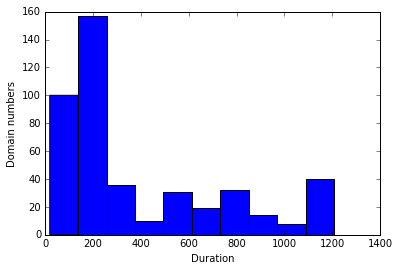

In [112]:
plt.xlabel('Duration')
plt.ylabel('Domain numbers')
gam_duration = np.array(gam_duration);
print len(gam_duration[gam_duration>0])
plt.hist(gam_duration[gam_duration>0]);